# Tensorflow로 구현하는 Regression
* Hypothesis : $H(x) = Wx + b$
* Cost : ${cost}(W, b) = \frac{1}{m}\displaystyle\sum_{i=1}^m(H(x^{(i)}) - y^{(i)})^2$

* tf.sqaure() : 제곱
    * tf.sqaure(3) : 9
* tf.reduce_mean() :차원을 줄이면서 평균 계산
    * tf.reduce_mean([1,2,3,4]) => 2.5
* tf.reduce_sum() : 차원을 줄이면서 합 계산
    * tf.reduce_sum([1,2,3,4,5]) : 15

step	   cost   	    W     
   0	689.56970215	2.90000010
  20	101.10919952	2.04691792
  40	101.10919952	2.04686332
  60	101.10919952	2.04686332
  80	101.10919952	2.04686332
 100	101.10919952	2.04686332
 120	101.10919952	2.04686332
 140	101.10919952	2.04686332
 160	101.10919952	2.04686332
 180	101.10919952	2.04686332
 200	101.10919952	2.04686332
 220	101.10919952	2.04686332
 240	101.10919952	2.04686332
 260	101.10919952	2.04686332
 280	101.10919952	2.04686332
 300	101.10919952	2.04686332


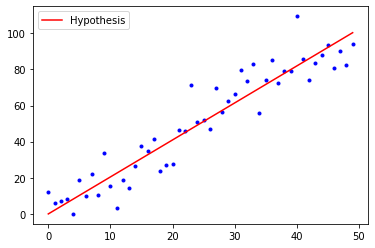

In [24]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

m = 50
x = np.arange(m)
y = x * 2
y = y + 10 * np.random.randn(m)

plt.plot(x, y, 'b.')

W = tf.Variable(2.9)   # 임의 값
hypothesis = W * x

err = hypothesis - y  # 정답과 차이
sqr_err = tf.square(err)  # 차이 제곱
cost = tf.reduce_mean(sqr_err) # 차원을 1줄이면서 평균 계산

learning_rate = 0.001# 학습률
gradient =  2/m * tf.reduce_sum(err * x)
descent = W - learning_rate * gradient
update = W.assign(descent)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}".format("step", "cost", "W"))
    for step in range(301):
        _, cost_, W_= sess.run([update, cost, W])
        if step % 20 == 0:
            print(f"{step:4}\t{cost_:10.8f}\t{W_:10.8f}")
            
plt.plot(x, x*W_, 'r', label='Hypothesis')
plt.legend()

## Cost Function and Optimizer
* MSE cost 함수
    * `tf.losses.mean_squared_error(labels, prediction)`
* Optimizer :
    * 경사 하강법 알고리즘을 구현한 옵티마니저(미분계산하여 W,b를 갱신)
    * `tf.train.GradientDescentOptimizer() `
        * optimizer.minimize(cost)

step	   cost   	    W     	    b     
   0	5981.5439453	 2.9000001	 0.5000000
 200	2004.1672363	 4.7020969	 9.9979591
 400	1641.3720703	 4.4440875	18.5095425
 600	1346.0947266	 4.2113218	26.1883774
 800	1105.7702637	 4.0013294	33.1159172
1000	910.1723633	 3.8118834	39.3656464
1200	750.9761963	 3.6409724	45.0039101
1400	621.4066162	 3.4867826	50.0905609
1600	515.9507446	 3.3476782	54.6795311
1800	430.1209717	 3.2221844	58.8195152
2000	360.2646484	 3.1089687	62.5544434
2200	303.4090576	 3.0068302	65.9239426
2400	257.1354370	 2.9146867	68.9637146
2600	219.4725342	 2.8315558	71.7061539
2800	188.8188324	 2.7565584	74.1802826
3000	163.8697815	 2.6888981	76.4123611
3200	143.5638123	 2.6278574	78.4260635
3400	127.0373230	 2.5727901	80.2427063
3600	113.5863953	 2.5231104	81.8816223
3800	102.6391220	 2.4782925	83.3601379
4000	93.7288895	 2.4378583	84.6940384
4200	86.4770126	 2.4013808	85.8974152
4400	80.5745544	 2.3684711	86.9830856
4600	75.7707443	 2.3387823	87.9625015
4800	71.8608856	 2.311998

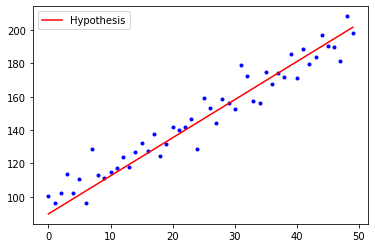

In [59]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()

m = 50
x = np.arange(m)
y = x * 2 + 100
y = y + 10 * np.random.randn(m)
plt.plot(x, y, 'b.')


W = tf.Variable(2.9)   # 임의 값
b = tf.Variable(0.5)   # 임의 값
hypothesis = W * x+ b

#err = hypothesis - y_train  # 정답과 차이
#sqr_err = tf.square(err)  # 차이 제곱
#cost = tf.reduce_mean(sqr_err) # 차원을 1줄이면서 평균 계산
cost = tf.losses.mean_squared_error(y, hypothesis)

learning_rate = 0.001  # 학습 율
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate) # 경사하강법
train = optimizer.minimize(cost) # 손실 최소화

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "W", "b"))
    for step in range(5001):
        _, cost_, W_, b_ = sess.run([train, cost, W, b])
        if step % 200 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_:10.7f}\t{b_:10.7f}")
    predict = sess.run(hypothesis)
plt.plot(x, predict, 'r', label='Hypothesis')
plt.legend()

## Variable 초기화
* tf.random_noarmal(shape, mean=0.0, stddev=1.0, dtype=float32,seed=None, name=None )
    * 임의의 수를 생성
    * alias of tf.random.normal()

## PlaceHolder
* 모델에 값을 고정하지 않고 실행시에 데이타 교체 가능
* tf.placeholder(dtype, shape=None, name=None)


step	   cost   	  Weight  	   bias   
   0	29990.1601562	[-0.8113182]	[-0.8113182]
 200	2351.2668457	[4.669009]	[9.482137]
 400	1934.0123291	[4.392312]	[18.610231]
 600	1594.4106445	[4.1426864]	[26.845259]
 800	1318.0106201	[3.917484]	[34.274574]
1000	1093.0506592	[3.7143154]	[40.977005]
1200	909.9559326	[3.5310237]	[47.02371]
1400	760.9370117	[3.3656657]	[52.47878]
1600	639.6514893	[3.2164865]	[57.40013]
1800	540.9381714	[3.0819032]	[61.839962]
2000	460.5954590	[2.9604867]	[65.84543]
2200	395.2052002	[2.85095]	[69.45899]
2400	341.9843750	[2.75213]	[72.71901]
2600	298.6690369	[2.6629803]	[75.66001]
2800	263.4138794	[2.5825508]	[78.31335]
3000	234.7197418	[2.50999]	[80.70709]
3200	211.3660889	[2.4445293]	[82.86661]
3400	192.3588409	[2.385474]	[84.81482]
3600	176.8887329	[2.3321955]	[86.57244]
3800	164.2976379	[2.2841299]	[88.15811]
4000	154.0499268	[2.2407668]	[89.58862]
4200	145.7092743	[2.2016463]	[90.87919]
4400	138.9209137	[2.166354]	[92.04348]
4600	133.3959045	[2.1345143]	[93.09385

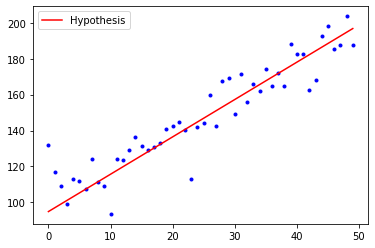

In [57]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()

m = 50
x = np.arange(m)
y = x * 2 + 100
y = y + 10 * np.random.randn(m)
plt.plot(x, y, 'b.')

W = tf.Variable(tf.random_normal([1], seed=1, name='weight')) # alias of tf.random.normal() 
b = tf.Variable(tf.random_normal([1], seed=1, name='bias')) # alias of tf.random.normal()

X = tf.placeholder(tf.float32, name='X') # placeholder for feed_dict
Y = tf.placeholder(tf.float32, name='Y') # tf.placeholder(dtype, shape=None, name=None)placeholder for feed_dict

hypothesis = W* X + b
cost = tf.losses.mean_squared_error(Y, hypothesis)

train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
                
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "Weight", "bias"))
    for step in range(5001):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x, Y:y})
        if step % 200 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_}\t{b_}")
    predict = sess.run(hypothesis, feed_dict={X:x})

plt.plot(x, predict, 'r', label='Hypothesis')
plt.legend()

## Cost History Plot
* tensorboard 를 이용한 학습 곡선 시각화
* `summ_cost = tf.summary.scalar('cost', cost)`
* `summ_str = sess.run(summ_cost)`
* `wrier.add_summary(summ_str, step)`
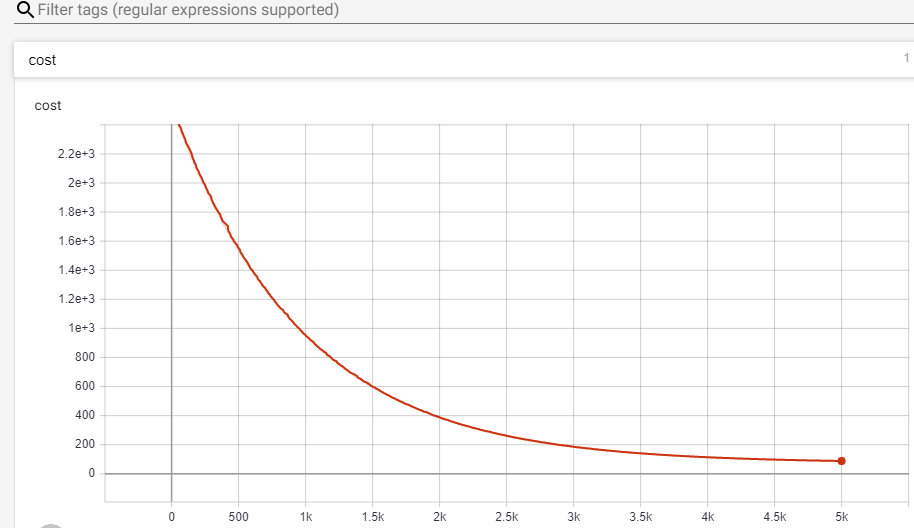

step	   cost   	  Weight  	   bias   
   0	29772.0878906	[-0.8113182]	[-0.8113182]
 200	2071.6867676	[4.6986675]	[8.916345]
 400	1699.8221436	[4.4374537]	[17.53366]
 600	1397.1644287	[4.201797]	[25.307856]
 800	1150.8321533	[3.9891963]	[32.32144]
1000	950.3439331	[3.7973964]	[38.648827]
1200	787.1677856	[3.6243622]	[44.357136]
1400	654.3593140	[3.4682572]	[49.506966]
1600	546.2669678	[3.3274248]	[54.152954]
1800	458.2915344	[3.2003717]	[58.344364]
2000	386.6890564	[3.0857503]	[62.125675]
2200	328.4121094	[2.9823427]	[65.53703]
2400	280.9822388	[2.8890555]	[68.61453]
2600	242.3777161	[2.8048923]	[71.39104]
2800	210.9577026	[2.7289634]	[73.8959]
3000	185.3847198	[2.660462]	[76.155716]
3200	164.5710602	[2.5986629]	[78.19444]
3400	147.6313477	[2.5429115]	[80.03365]
3600	133.8440094	[2.4926143]	[81.69294]
3800	122.6229477	[2.4472392]	[83.189835]
4000	113.4898605	[2.4063022]	[84.54032]
4200	106.0567169	[2.3693717]	[85.758644]
4400	100.0067673	[2.3360536]	[86.857796]
4600	95.0828705	[2.305996

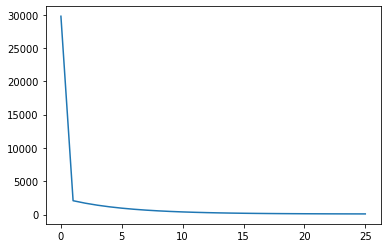

In [65]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

tf.reset_default_graph()

now_str = time.strftime("%Y%m%d-%H%M%S")
m = 50
x = np.arange(m)
y = x * 2 + 100

y = y + 10 * np.random.randn(m)

W = tf.Variable(tf.random_normal([1], seed=1, name='weight')) # alias of tf.random.normal() 
b = tf.Variable(tf.random_normal([1], seed=1, name='bias')) # alias of tf.random.normal()

X = tf.placeholder(tf.float32, name='X') # placeholder for feed_dict
Y = tf.placeholder(tf.float32, name='Y') # tf.placeholder(dtype, shape=None, name=None)placeholder for feed_dict

hypothesis = W* X + b
cost = tf.losses.mean_squared_error(Y, hypothesis)
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)


writer = tf.summary.FileWriter('./logs/'+now_str, tf.get_default_graph())
sum_cost = tf.summary.scalar('cost', cost)

hist_cost = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "Weight", "bias"))
    for step in range(5001):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x, Y:y})
        summ = sess.run(sum_cost, feed_dict={X:x, Y:y})
        writer.add_summary(summ, step)
        if step % 200 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_}\t{b_}")
            hist_cost.append(cost_)

plt.plot( hist_cost)
plt.show()

writer.close()

## MultiVariable Regression
* tf.matmul(a,b)
    * 행렬곱 연산
    * alias for tf.linalg.matmul(a, b) 
    

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

m = 50
x_data = np.ones((m,2), dtype=np.float32)
x_data[:, 0] = np.random.randint(0, 50, (m))
x_data[:, 1] = np.random.randint(0, 50, (m))
y_data = x_data.T[0] * 0.7 + x_data.T[1] * 0.3 + 50
#matmul = tf.matmul(x_data, [[0.7], [0.3]]) + 50
#s = tf.Session()
#y_data = s.run(matmul)
y_data = y_data.reshape(-1,1)
print(x_data[:20])
print(y_data[:20])

W1028 22:27:49.667455 53980 deprecation.py:323] From c:\python36\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


[[29. 24.]
 [ 2. 41.]
 [11. 43.]
 [15. 29.]
 [45. 26.]
 [20.  5.]
 [36.  5.]
 [34. 23.]
 [ 9. 45.]
 [32. 29.]
 [ 3. 34.]
 [28. 13.]
 [ 6.  9.]
 [49. 33.]
 [13. 15.]
 [43. 36.]
 [11.  8.]
 [ 2.  7.]
 [ 6. 46.]
 [34. 49.]]
[[77.5     ]
 [63.7     ]
 [70.6     ]
 [69.2     ]
 [89.3     ]
 [65.5     ]
 [76.7     ]
 [80.7     ]
 [69.8     ]
 [81.1     ]
 [62.300003]
 [73.5     ]
 [56.9     ]
 [94.2     ]
 [63.6     ]
 [90.9     ]
 [60.1     ]
 [53.5     ]
 [68.      ]
 [88.5     ]]


In [5]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal(shape=[2,1], seed=1), name='weight');
b = tf.Variable(tf.random_normal(shape=[1], seed=1), name='bias');

hypothesis = tf.matmul(X, W) + b 

cost = tf.losses.mean_squared_error(Y, hypothesis)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)
train = optimizer.minimize(cost)
hist_cost = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("{:^4}\t{:^10}\t{:^10}\t{:^10}\t{:^10}".format("step", "cost", "W1","W2", "bias"))
    for step in range(40001):
        _, cost_, W_, b_ = sess.run([train, cost, W, b], feed_dict={X:x_data, Y:y_data})
        if np.isnan(cost_) : break
        hist_cost.append(cost_)
        if step % 1000 == 0:
            print(f"{step:4}\t{cost_:10.7f}\t{W_[0]}, {W_[1]}, \t{b_}")


step	   cost   	    W1    	    W2    	   bias   
   0	3994.7692871	[-0.8113182], [1.4845988], 	[-0.8113182]
1000	294.6987000	[1.3423281], [1.1433648], 	[6.5558076]
2000	215.6884308	[1.2495171], [1.0215057], 	[12.833127]
3000	157.8611298	[1.1701163], [0.9172541], 	[18.203436]
4000	115.5375977	[1.1021882], [0.82806575], 	[22.797785]
5000	84.5614243	[1.0440756], [0.75176483], 	[26.728268]
6000	61.8900108	[0.9943595], [0.6864885], 	[30.090841]
7000	45.2970543	[0.9518272], [0.6306445], 	[32.967533]
8000	33.1526794	[0.9154404], [0.58286923], 	[35.428577]
9000	24.2643108	[0.8843112], [0.5419972], 	[37.534016]
10000	17.7588673	[0.85767955], [0.5070303], 	[39.335262]
11000	12.9975491	[0.8348958], [0.4771157], 	[40.87625]
12000	 9.5128508	[0.8154046], [0.45152408], 	[42.19455]
13000	 6.9624214	[0.7987297], [0.42963025], 	[43.322365]
14000	 5.0957432	[0.784464], [0.4108996], 	[44.287235]
15000	 3.7295532	[0.7722597], [0.39487562], 	[45.11268]
16000	 2.7296395	[0.76181877], [0.3811669], 	[45.81885

## Logistic Regression
* tf.sigmoid(x)
    * $y = 1 / (1 + exp(-x))$
* tf.equal(a, b)
    * alias of tf.math.equal(a, b)
    * a == b 연산 반환, boolean 
* tf.cast(x, dtype)
    * x를 dtype으로 변환
    * alias of tf.dtypes.cast()
    * tf.cast(h > 0.5, tf.float32) : boolean을 float로 변환

0 0.6930635
1000 0.53264517
2000 0.51650107
3000 0.51560235
4000 0.51537824
5000 0.51523256
6000 0.51509815
7000 0.51494753
8000 0.5147501
9000 0.5144472
10000 0.5139273
Accuracy:0.9700000286102295


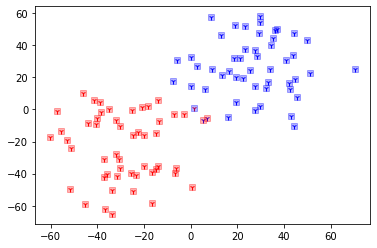

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

ma, mb = 50, 50
m = ma + mb
Xa = np.random.randint(-50,0, (ma, 2))
Xb = np.random.randint(0,50, (mb, 2))


x_data = np.concatenate((Xa, Xb), axis=0)
x_data = x_data + 10* np.random.randn(m,2)
y_data = np.zeros((m))
y_data[mb:] = 1
y_data = y_data.reshape(-1,1)

plt.plot(x_data[y_data[:,0]==0][:,0],x_data[y_data[:,0]==0][:,1], 'r1')
plt.plot(x_data[y_data[:,0]==1][:,0],x_data[y_data[:,0]==1][:,1], 'b1')

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2,1], seed=1))
b = tf.Variable(tf.random_normal([1], seed=1))

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

#cost = -tf.reduce_mean(Y* tf.log(hypothesis) + (1-Y) * tf.log(1 - hypothesis))
#cost = tf.reduce_mean(-Y * tf.log(hypothesis) - (1-Y) * tf.log(1 - hypothesis))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_, _ = sess.run([cost, train], feed_dict={X:x_data, Y:y_data})
        if np.isnan(cost_) : break
        if step % 1000 == 0:
            print(step, cost_)
    h, p, a = sess.run([hypothesis, predict, accuracy], feed_dict={X:x_data, Y:y_data})
    print('Accuracy:{}'.format(a))

plt.plot(x_data[p[:,0]==0][:,0],x_data[p[:,0]==0][:,1], 'rs', alpha=0.3)
plt.plot(x_data[p[:,0]==1][:,0],x_data[p[:,0]==1][:,1], 'bs', alpha=0.3)

## Softmax
* tf.nn.softmax()
    * tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
* tf.argmax()
    * alias of tf.math.argmax()
    * 가장 큰 값의 인덱스 반환

Text(0.5, 1.0, 'Input')

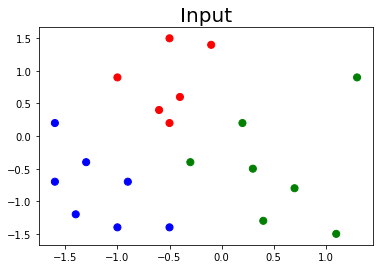

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

x_data = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]])
y_label = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_data =  np.eye(3)[y_label]

colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[y_label])
plt.title('Input', size=20)

0 1.8761467
200 0.9105875
400 0.5823543
600 0.4458871
800 0.37363476
1000 0.3280304
1200 0.29596958
1400 0.27183512
1600 0.25280342
1800 0.23728427
2000 0.22430491
2200 0.21323252
2400 0.20363493
2600 0.19520593
2800 0.18772167
3000 0.18101403
3200 0.17495422
3400 0.16944167
3600 0.1643963
3800 0.15975372
4000 0.15546148
4200 0.15147626
4400 0.14776188
4600 0.14428799
4800 0.14102884
5000 0.13796237
Accuracy:1.0


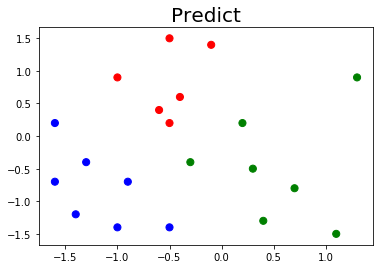

In [159]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 3])

W = tf.Variable(tf.random_normal([2, 3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(hypothesis), axis=1))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(5001):
        _, cost_ = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, cost_)
    
    predict = tf.argmax(hypothesis, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
    h, p, a = sess.run([hypothesis, predict, accuracy ], feed_dict={X:x_data})
    print("Accuracy:{}".format(a))

plt.title('Predict', size=20)
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[p])
plt.show()

### Cross Entropy
* tf.nn.softmax_cross_entropy_with_logits_v2(label, logits)
    * logits와 label간의 cross entropy 를 계산

### 모델 저장
* `saver = tf.train.Saver(tf.global_variables())`
* `saver.save(sess, './model/my_model.ckpt')`
    

Tensor("predict:0", shape=(?,), dtype=int64)
0 1.1436459
200 1.1127551
400 1.081922
600 1.0512514
800 1.0227146
1000 0.99886495
1200 0.9804665
1400 0.96636695
1600 0.95494044
1800 0.94480026
2000 0.9347826
2200 0.9237236
2400 0.91023844
2600 0.89269525
2800 0.8698675
3000 0.8424367
3200 0.8134192
3400 0.78626287
3600 0.76316565
3800 0.744614
4000 0.72992647
4200 0.7181331
4400 0.7084261
4600 0.70023793
4800 0.69319355
5000 0.6870487
Accuracy:0.949999988079071


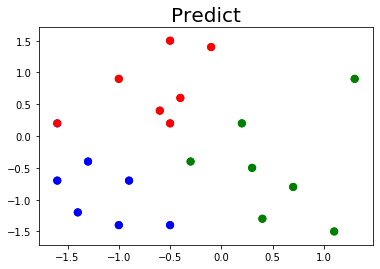

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

model_path = './models/cross_entroy.ckpt'


x_data = np.array([[-0.1, 1.4],
              [-0.5, 0.2],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.6, 0.2],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5, 1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-0.7],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5],
              [-1.6,-0.7],
              [-0.5,-1.4],
              [-1.0,-1.4]])
y_label = np.array([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])
y_data =  np.eye(3)[y_label]

colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[y_label])
plt.title('Input', size=20)
X = tf.placeholder(tf.float32, [None, 2], name='X')
Y = tf.placeholder(tf.float32, [None, 3], name='Y')

W = tf.Variable(tf.random_normal([2, 3]), name='W')
b = tf.Variable(tf.random_normal([3]), name='b')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

predict = tf.argmax(hypothesis, axis=1, name='predict')
print(predict)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict, y_label),tf.float32))
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    
    for step in range(5001):
        _, cost_ = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
        if step % 200 == 0:
            print(step, cost_)
    
    h, p, a = sess.run([hypothesis, predict, accuracy ], feed_dict={X:x_data})
    print("Accuracy:{}".format(a))
    
    saver.save(sess, model_path)
    
plt.title('Predict', size=20)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[p])
plt.show()

### 모델 복원
* `new_saver = tf.train.import_meta_graph(model_save_path + '.meta')`
    * 저장된 그래프 구조를 읽어서 default graph에 추가
* `new_saver.restore(sess, model_save_path)`
    * sess에 저장된 변수를 복원

[]
[<tf.Operation 'X' type=Placeholder>, <tf.Operation 'Y' type=Placeholder>, <tf.Operation 'random_normal/shape' type=Const>, <tf.Operation 'random_normal/mean' type=Const>, <tf.Operation 'random_normal/stddev' type=Const>, <tf.Operation 'random_normal/RandomStandardNormal' type=RandomStandardNormal>, <tf.Operation 'random_normal/mul' type=Mul>, <tf.Operation 'random_normal' type=Add>, <tf.Operation 'W' type=VariableV2>, <tf.Operation 'W/Assign' type=Assign>, <tf.Operation 'W/read' type=Identity>, <tf.Operation 'random_normal_1/shape' type=Const>, <tf.Operation 'random_normal_1/mean' type=Const>, <tf.Operation 'random_normal_1/stddev' type=Const>, <tf.Operation 'random_normal_1/RandomStandardNormal' type=RandomStandardNormal>, <tf.Operation 'random_normal_1/mul' type=Mul>, <tf.Operation 'random_normal_1' type=Add>, <tf.Operation 'b' type=VariableV2>, <tf.Operation 'b/Assign' type=Assign>, <tf.Operation 'b/read' type=Identity>, <tf.Operation 'MatMul' type=MatMul>, <tf.Operation 'add' t

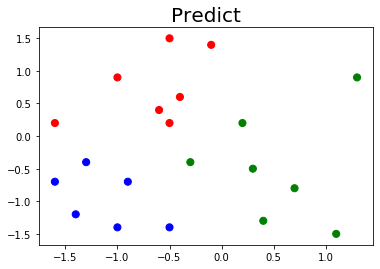

In [183]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()
model_path = './models/cross_entroy.ckpt'
new_saver = tf.train.import_meta_graph(model_path + '.meta')
print(tf.get_default_graph().get_operations())

with tf.Session() as sess:
    new_saver.restore(sess, model_path)
    my_model = sess.graph.get_tensor_by_name("predict:0")
    X = sess.graph.get_tensor_by_name("X:0")
    p = sess.run(my_model, feed_dict={X:x_data})

plt.title('Predict', size=20)
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x_data[:,0], x_data[:,1], s=50, c=colormap[p])
plt.show()